<a href="https://colab.research.google.com/github/ericjin92/ej/blob/main/%E5%9F%8E%E5%B8%82%E3%80%81%E6%98%8E%E6%98%9F%E8%88%87%E6%88%B0%E7%B8%BE_NBA_%E7%90%83%E9%9A%8A%E5%90%B8%E5%BC%95%E5%8A%9B%E8%88%87%E8%A1%A8%E7%8F%BE%E4%B9%8B%E6%95%B8%E6%93%9A%E6%8E%A2%E8%A8%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 城市、明星與戰績：NBA 球隊吸引力與表現之數據探討

### 摘要

本研究透過整合 2005 至 2024 年間 NBA 球隊在觀眾入場、戰績、球星數量與所屬城市人口等多面向資料，分析其彼此之關聯性，探討影響球隊人氣與表現的可能因素。

### 引言

#### 背景

NBA 作為全球最具影響力的職業籃球聯盟之一，球隊的表現與人氣長年為球迷與研究者所關注。除了比賽本身，城市規模、球星效應、戰績與觀眾互動等面向亦可能構成關鍵因素。

#### 目的


本研究旨在探討影響 NBA 球隊人氣與戰績的潛在因素，藉由資料視覺化與統計分析，提供更具體的實證依據。

#### 待答問題


1. 城市人口對觀眾基礎有無影響？

2. 明星球員是否會受大城市吸引?

3. 勝率是否影響觀眾與熱度？

4. 明星球員多寡是否吸引更多觀眾入場？

5. 明星球員數量對戰績的影響力？

### 方法

#### 數據來源

- 維基百科

 - [NBA 球隊場館資料](https://zh.wikipedia.org/zh-tw/NBA%E5%A0%B4%E9%A4%A8%E5%88%97%E8%A1%A8)

 - [美國城市人口](https://zh.wikipedia.org/zh-tw/%E7%BE%8E%E5%9C%8B%E5%9F%8E%E5%B8%82%E4%BA%BA%E5%8F%A3%E6%8E%92%E5%BA%8F%E5%88%97%E8%A1%A8)

 - [加拿大各省人口](https://zh.wikipedia.org/wiki/%E5%8A%A0%E6%8B%BF%E5%A4%A7%E4%BA%BA%E5%8F%A3)

- ESPN

 - [NBA 觀眾入場數](https://www.espn.com/nba/attendance/_/year/2024)

 - [NBA 戰績](https://www.espn.com/nba/standings/_/group/league)

- BASKETBALL REFERENCE

 - [NBA 全明星名單](https://www.basketball-reference.com/allstar/NBA_2024.html)

#### 分析工具

- **Python**（數據處理與分析）

- **Pandas**（數據清理與統計分析）

- **Matplotlib / Seaborn**（數據視覺化）

#### 數據處理

1. 各資料依球隊名稱進行合併。

2. 人口數標準化處理（對數或百萬為單位），以利跨城市比較。

3. 補齊或略過球隊搬遷/缺值年份資料。

4. 建立全明星字典，計算每季每隊明星球員數。

5. 使用 Seaborn 與 Matplotlib 繪製出視覺化圖表。

### 安裝函式庫

由於 Matplotlib 和 Seaborn 預設無法顯示中文，需先設定繁體中文。

In [1]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-05-03 09:03:15--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.107.113, 142.251.107.139, 142.251.107.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-05-03 09:03:15--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  79.3MB/s    in 0.2s    

2025-05-03 09:03:1

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

下載 Gradio 元件

In [13]:
!pip install gradio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.9 MB/s eta 0:00:00


### 收集資料

#### NBA 球隊所屬城市人口數

NBA 球隊位置資料導入，保留球隊及對應城市。因部分球隊會更換場館位置，這邊統一將球隊城市設為2025年的所在位置。

In [3]:
import pandas as pd
# 讀取表格
url1 = 'https://zh.wikipedia.org/zh-tw/NBA%E5%A0%B4%E9%A4%A8%E5%88%97%E8%A1%A8'
tables1 = pd.read_html(url1)
df_arena = tables1[0]
# 刪除不需要的資料
df_arena = df_arena[['位置','球隊']]
# 修改位置資料
df_arena['位置'] = df_arena['位置'].replace({'曼非斯': '曼菲斯','俄克拉荷馬市': '奧克拉荷馬市'})
# 修改欄位名稱
df_arena = df_arena.rename(columns={'位置': '城市'})

<ipython-input-3-8d1375e41e2a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arena['位置'] = df_arena['位置'].replace({'曼非斯': '曼菲斯','俄克拉荷馬市': '奧克拉荷馬市'})


美國所屬城市人口數導入，保留城市、2020年平均人口、2010年平均人口。

In [4]:
import pandas as pd
import re
# 讀取表格
url2 = 'https://zh.wikipedia.org/zh-tw/%E7%BE%8E%E5%9C%8B%E5%9F%8E%E5%B8%82%E4%BA%BA%E5%8F%A3%E6%8E%92%E5%BA%8F%E5%88%97%E8%A1%A8'
tables2 = pd.read_html(url2)
df_population = tables2[2]
# 刪除不需要的資料
df_population = df_population[['城市','2020年 人口普查','2010年 人口普查']]
# 刪除不必要的標註
df_population['城市'] = df_population['城市'].apply(lambda x: re.sub(r'\[.*\]|\(.*\)', '', x).strip())
# 篩選城市符合nba球隊位置的資料
df_population = df_population[df_population['城市'].isin(df_arena['城市'])]
# 布魯克林區城市屬紐約市內，多倫多屬加拿大安大略省的首都
# 將布魯克林區人口設置為紐約市，多倫多人口額外設置
new_data = [{'城市': '布魯克林區', '2020年 人口普查': 8804190, '2010年 人口普查': 8175133},
       {'城市': '多倫多', '2020年 人口普查': 14223942, '2010年 人口普查': 13448494}]
df_population = pd.concat([df_population,pd.DataFrame(new_data)],ignore_index=True)

<ipython-input-4-c7829a8834b5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population['城市'] = df_population['城市'].apply(lambda x: re.sub(r'\[.*\]|\(.*\)', '', x).strip())


合併表格，呈現出 NBA 球隊所屬城市人口數。

In [5]:
#合併
nba_population = pd.merge(df_arena, df_population, on='城市', how='outer')
# 排序
nba_population = nba_population.sort_values(by='球隊', ascending=True)
# 針對所有欄位，移除空白並嘗試轉為 int
for col in nba_population.columns:
    # 將值轉成字串，移除空格，再嘗試轉成 int，如果失敗就保留原值
    nba_population[col] = nba_population[col].astype(str).str.replace(' ', '').str.replace('\u3000', '')
    try:
        nba_population[col] = nba_population[col].astype(int)
    except ValueError:
        pass  # 如果不能轉成 int，就保留為文字欄位
#列的索引值重製
nba_population = nba_population.reset_index(drop=True)
#存取數據
nba_population.to_csv('NBA_球隊所屬城市人口數.csv', index=False, encoding='utf-8-sig')
nba_population

,城市,球隊,2020年 人口普查,2010年 人口普查
0,丹佛,丹佛金塊,715522,600158
1,亞特蘭大,亞特蘭大老鷹,498715,420003
2,休士頓,休士頓火箭,2304580,2099451
3,克里夫蘭,克里夫蘭騎士,372624,396815
4,印第安納波利斯,印第安納溜馬,887642,820445
5,夏洛特,夏洛特黃蜂,874579,731424
6,多倫多,多倫多暴龍,14223942,13448494
7,奧克拉荷馬市,奧克拉荷馬雷霆,681054,579999
8,奧蘭多,奧蘭多魔術,307573,238300
9,密爾瓦基,密爾瓦基公鹿,577222,594833


#### NBA 2005 - 2024 賽季歷年觀眾入場人數

NBA 觀眾入場數導入，保留球隊、各隊平均入場觀眾數。

In [6]:
import pandas as pd
# 設置空集合
all_years_attendance = None
# 從 2005 到 2024 年
for year in range(2005, 2025):
    url3 = f'https://www.espn.com/nba/attendance/_/year/{year}'
    table3 = pd.read_html(url3)
    df_attendance = table3[0]
    # 擷取球隊與平均入場觀眾數欄位
    team = df_attendance.iloc[2:32, 1].reset_index(drop=True)
    overall = df_attendance.iloc[2:32, 10].reset_index(drop=True)
    df_year_attendance = pd.DataFrame({'球隊':team,f'{year}年平均入場觀眾數':overall})
    # 2005年直接指定，後續用merge對齊
    if all_years_attendance is None:
      all_years_attendance = df_year_attendance
    else:
      all_years_attendance = pd.merge(all_years_attendance, df_year_attendance, on='球隊', how='outer')

In [7]:
#修改中文名稱為英文
all_years_attendance['球隊'] = all_years_attendance['球隊'].replace({
    'Mavericks': '達拉斯獨行俠',
    'Magic': '奧蘭多魔術',
    'Spurs': '聖安東尼奧馬刺',
    'Nuggets': '丹佛金塊',
    'Nets': '布魯克林籃網',
    'Wizards': '華盛頓巫師',
    'Warriors': '金州勇士',
    'Clippers': '洛杉磯快艇',
    'Lakers': '洛杉磯湖人',
    'Grizzlies': '曼菲斯灰熊',
    'Bucks': '密爾瓦基公鹿',
    'Suns': '鳳凰城太陽',
    'Heat': '邁阿密熱火',
    'Pacers': '印第安納溜馬',
    'Kings': '沙加緬度國王',
    'Pistons': '底特律活塞',
    'NY Knicks': '紐約尼克',
    'Trail Blazers': '波特蘭拓荒者',
    'Thunder': '奧克拉荷馬雷霆',
    'Cavaliers': '克里夫蘭騎士',
    'Raptors': '多倫多暴龍',
    'Pelicans': '紐奧良鵜鶘',
    'Hornets': '夏洛特黃蜂',
    'Hawks': '亞特蘭大老鷹',
    'Timberwolves': '明尼蘇達灰狼',
    'Celtics': '波士頓塞爾提克',
    'Rockets': '休士頓火箭',
    'Bulls': '芝加哥公牛',
    'Jazz': '猶他爵士',
    '76ers': '費城76人'
})
# 排序
all_years_attendance = all_years_attendance.sort_values(by='球隊', ascending=True)
# 針對所有欄位，移除空白並嘗試轉為 int
for col in all_years_attendance.columns:
    # 將值轉成字串，移除空格，再嘗試轉成 int，如果失敗就保留原值
    all_years_attendance[col] = all_years_attendance[col].astype(str).str.replace(' ', '').str.replace('\u3000', '')
    try:
        all_years_attendance[col] = all_years_attendance[col].astype(int)
    except ValueError:
        pass  # 如果不能轉成 int，就保留為文字欄位
#列的索引值重製
all_years_attendance = all_years_attendance.reset_index(drop=True)
#存取數據
all_years_attendance.to_csv('NBA_2005_2024賽季歷年觀眾入場人數.csv', index=False, encoding='utf-8-sig')
all_years_attendance

,球隊,2005年平均入場觀眾數,2006年平均入場觀眾數,2007年平均入場觀眾數,2008年平均入場觀眾數,2009年平均入場觀眾數,2010年平均入場觀眾數,2011年平均入場觀眾數,2012年平均入場觀眾數,2013年平均入場觀眾數,...,2015年平均入場觀眾數,2016年平均入場觀眾數,2017年平均入場觀眾數,2018年平均入場觀眾數,2019年平均入場觀眾數,2020年平均入場觀眾數,2021年平均入場觀眾數,2022年平均入場觀眾數,2023年平均入場觀眾數,2024年平均入場觀眾數
0,丹佛金塊,17582,17387,17696,17740,17225,17720,17093,17128,17610,...,16068,15923,16095,17506,17962,18190,3023,16911,18431,18948
1,亞特蘭大老鷹,15516,16069,16382,16567,17025,16821,16303,16010,16145,...,17497,17222,16887,16088,16557,16901,2397,16736,17804,17701
2,休士頓火箭,17182,16534,17366,17526,17536,16572,16567,16548,17327,...,18099,17861,17556,18137,17989,18074,3259,16120,16995,17866
3,克里夫蘭騎士,18701,19063,19688,19228,19455,19881,18156,16324,16486,...,19738,19736,19791,19825,18490,18014,2828,17813,18754,18862
4,印第安納溜馬,16944,16902,16581,14719,15405,15578,15191,15382,16154,...,17378,17349,17272,16889,17377,16914,2840,15577,16774,17453
5,夏洛特黃蜂,15574,16741,16513,16005,15935,16040,16159,15645,15913,...,17423,17634,17448,16999,17074,16550,2981,17294,17578,17358
6,多倫多暴龍,16916,16826,17802,18044,17779,17181,16710,16784,17229,...,18637,18494,18878,18756,19032,18792,2152,17913,18771,18754
7,奧克拉荷馬雷霆,16752,16697,16700,15257,17674,17440,17961,18117,18269,...,18079,18230,18288,18534,18034,18034,2203,15768,16726,17927
8,奧蘭多魔術,16047,16322,17282,17420,17466,17649,18200,18028,17208,...,17185,17359,17543,17770,17610,17171,3405,16127,17888,18491
9,密爾瓦基公鹿,16094,16868,16768,16167,16168,15965,16162,15689,15977,...,16044,16394,16878,17547,17893,17805,2612,17555,17913,18139


#### NBA 2005 - 2024 賽季歷年戰績

NBA 戰績導入，保留球隊名稱、各隊勝場數、各隊敗場數、各隊勝率。

In [8]:
import pandas as pd

# 初始化總表
all_years_standings = pd.DataFrame()

for year in range(2005, 2025):
   url4 = f'https://www.espn.com/nba/standings/_/season/{year}/group/league'
   table4 = pd.read_html(url4)
   # 抓取球隊、勝場、敗場、勝率
   team = table4[0]
   # 將欄位名稱轉成一列資料
   header = pd.DataFrame([team.columns.tolist()], columns=team.columns)
   # 插入該列為row0
   team = pd.concat([header, team], ignore_index=True)
   # 修改欄位名稱
   team.columns = ['球隊']
   # 設定球隊為欄位索引
   teamidx = team.set_index('球隊')
   # 移除開頭的z--、y--、x--、e--、*--、xp--、pd--
   team['球隊'] = team['球隊'].str.replace(r'^(xp|pd|pb|[xyz]|e|\*)\s?--', '', regex=True).str.strip()
   #修改球隊名稱為最新
   team['球隊'] = team['球隊'].replace({
       'SEASeattle SuperSonics': 'OKCOklahoma City Thunder',
       'CHACharlotte Bobcats':'CHACharlotte Hornets',
       'NJNew Jersey Nets':'BKNBrooklyn Nets',
       'NONO/Oklahoma City  Hornets':'NONew Orleans Pelicans',
       'NONO/Oklahoma City Hornets':'NONew Orleans Pelicans',
       'NONew Orleans Hornets':'NONew Orleans Pelicans'})
   pct = table4[1]['PCT']
   df_year_standings = pd.DataFrame({f'{year}年勝率': pct})
   df_year_standings = pd.concat([team, df_year_standings], axis=1)
   # 合併進總表
   if all_years_standings.empty:
     all_years_standings = df_year_standings
   else:
     all_years_standings = pd.merge(all_years_standings, df_year_standings, on='球隊', how='outer')

# 將所有勝率欄位乘以 100 並保留兩位小數，再加上百分比符號
pct_cols = all_years_standings.filter(like='年勝率').columns
all_years_standings[pct_cols] = all_years_standings[pct_cols].astype(float).multiply(100).round(2).astype(str) + '%'

In [9]:
#修改中文名稱為英文
all_years_standings['球隊'] = all_years_standings['球隊'].replace({
    'DALDallas Mavericks': '達拉斯獨行俠',
    'ORLOrlando Magic': '奧蘭多魔術',
    'SASan Antonio Spurs': '聖安東尼奧馬刺',
    'DENDenver Nuggets': '丹佛金塊',
    'BKNBrooklyn Nets': '布魯克林籃網',
    'WSHWashington Wizards': '華盛頓巫師',
    'GSGolden State Warriors': '金州勇士',
    'LACLA Clippers': '洛杉磯快艇',
    'LALLos Angeles Lakers': '洛杉磯湖人',
    'MEMMemphis Grizzlies': '曼菲斯灰熊',
    'MILMilwaukee Bucks': '密爾瓦基公鹿',
    'PHXPhoenix Suns': '鳳凰城太陽',
    'MIAMiami Heat': '邁阿密熱火',
    'INDIndiana Pacers': '印第安納溜馬',
    'SACSacramento Kings': '沙加緬度國王',
    'DETDetroit Pistons': '底特律活塞',
    'NYNew York Knicks': '紐約尼克',
    'PORPortland Trail Blazers': '波特蘭拓荒者',
    'OKCOklahoma City Thunder': '奧克拉荷馬雷霆',
    'CLECleveland Cavaliers': '克里夫蘭騎士',
    'TORToronto Raptors': '多倫多暴龍',
    'NONew Orleans Pelicans': '紐奧良鵜鶘',
    'CHACharlotte Hornets': '夏洛特黃蜂',
    'ATLAtlanta Hawks': '亞特蘭大老鷹',
    'MINMinnesota Timberwolves': '明尼蘇達灰狼',
    'BOSBoston Celtics': '波士頓塞爾提克',
    'HOUHouston Rockets': '休士頓火箭',
    'CHIChicago Bulls': '芝加哥公牛',
    'UTAHUtah Jazz': '猶他爵士',
    'PHIPhiladelphia 76ers': '費城76人'
})
# 排序
all_years_standings = all_years_standings.sort_values(by='球隊', ascending=True)
# 針對所有欄位，移除空白並嘗試轉為 int
for col in all_years_standings.columns:
    # 將值轉成字串，移除空格，再嘗試轉成 int，如果失敗就保留原值
    all_years_standings[col] = all_years_standings[col].astype(str).str.replace(' ', '').str.replace('\u3000', '')
    try:
        all_years_standings[col] = all_years_standings[col].astype(int)
    except ValueError:
        pass  # 如果不能轉成 int，就保留為文字欄位
#列的索引值重製
all_years_standings = all_years_standings.reset_index(drop=True)
#存取數據
all_years_standings.to_csv('NBA_2005_2024賽季歷年戰績.csv', index=False, encoding='utf-8-sig')
all_years_standings

,球隊,2005年勝率,2006年勝率,2007年勝率,2008年勝率,2009年勝率,2010年勝率,2011年勝率,2012年勝率,2013年勝率,...,2015年勝率,2016年勝率,2017年勝率,2018年勝率,2019年勝率,2020年勝率,2021年勝率,2022年勝率,2023年勝率,2024年勝率
0,丹佛金塊,59.8%,53.7%,54.9%,61.0%,65.9%,64.6%,61.0%,57.6%,69.5%,...,36.6%,40.2%,48.8%,56.1%,65.9%,63.0%,65.3%,58.5%,64.6%,69.5%
1,亞特蘭大老鷹,15.9%,31.7%,36.6%,45.1%,57.3%,64.6%,53.7%,60.6%,53.7%,...,73.2%,58.5%,52.4%,29.3%,35.4%,29.9%,56.9%,52.4%,50.0%,43.9%
2,休士頓火箭,62.2%,41.5%,63.4%,67.1%,64.6%,51.2%,52.4%,51.5%,54.9%,...,68.3%,50.0%,67.1%,79.3%,64.6%,61.1%,23.6%,24.4%,26.8%,50.0%
3,克里夫蘭騎士,51.2%,61.0%,61.0%,54.9%,80.5%,74.4%,23.2%,31.8%,29.3%,...,64.6%,69.5%,62.2%,61.0%,23.2%,29.2%,30.6%,53.7%,62.2%,58.5%
4,印第安納溜馬,53.7%,50.0%,42.7%,43.9%,43.9%,39.0%,45.1%,63.6%,60.5%,...,46.3%,54.9%,51.2%,58.5%,58.5%,61.6%,47.2%,30.5%,42.7%,57.3%
5,夏洛特黃蜂,22.0%,31.7%,40.2%,39.0%,42.7%,53.7%,41.5%,10.6%,25.6%,...,40.2%,58.5%,43.9%,43.9%,47.6%,35.4%,45.8%,52.4%,32.9%,25.6%
6,多倫多暴龍,40.2%,32.9%,57.3%,50.0%,40.2%,48.8%,26.8%,34.8%,41.5%,...,59.8%,68.3%,62.2%,72.0%,70.7%,73.6%,37.5%,58.5%,50.0%,30.5%
7,奧克拉荷馬雷霆,63.4%,42.7%,37.8%,24.4%,28.0%,61.0%,67.1%,71.2%,73.2%,...,54.9%,67.1%,57.3%,58.5%,59.8%,61.1%,30.6%,29.3%,48.8%,69.5%
8,奧蘭多魔術,43.9%,43.9%,48.8%,63.4%,72.0%,72.0%,63.4%,56.1%,24.4%,...,30.5%,42.7%,35.4%,30.5%,51.2%,45.2%,29.2%,26.8%,41.5%,57.3%
9,密爾瓦基公鹿,36.6%,48.8%,34.1%,31.7%,41.5%,56.1%,42.7%,47.0%,46.3%,...,50.0%,40.2%,51.2%,53.7%,73.2%,76.7%,63.9%,62.2%,70.7%,59.8%


#### NBA 2005 - 2024 賽季歷年球隊明星球員數

先建立 NBA 球隊列表、 NBA 球隊英文縮寫對應中文隊名字典、歷史球隊名稱縮寫標準化字典

In [10]:
# NBA 30隊
nba_teams = [
    '亞特蘭大老鷹', '波士頓塞爾提克', '布魯克林籃網', '夏洛特黃蜂', '芝加哥公牛',
    '克里夫蘭騎士', '達拉斯獨行俠', '丹佛金塊', '底特律活塞', '金州勇士',
    '休士頓火箭', '印第安納溜馬', '洛杉磯快艇', '洛杉磯湖人', '曼菲斯灰熊',
    '邁阿密熱火', '密爾瓦基公鹿', '明尼蘇達灰狼', '紐奧良鵜鶘', '紐約尼克',
    '奧克拉荷馬雷霆', '奧蘭多魔術', '費城76人', '鳳凰城太陽', '波特蘭拓荒者',
    '沙加緬度國王', '聖安東尼奧馬刺', '多倫多暴龍', '猶他爵士', '華盛頓巫師'
]

# NBA 英文縮寫對中文隊名對照表
team_map = {
    'ATL': '亞特蘭大老鷹', 'BOS': '波士頓塞爾提克', 'BRK': '布魯克林籃網', 'CHO': '夏洛特黃蜂',
    'CHI': '芝加哥公牛', 'CLE': '克里夫蘭騎士', 'DAL': '達拉斯獨行俠', 'DEN': '丹佛金塊',
    'DET': '底特律活塞', 'GSW': '金州勇士', 'HOU': '休士頓火箭', 'IND': '印第安納溜馬',
    'LAC': '洛杉磯快艇', 'LAL': '洛杉磯湖人', 'MEM': '曼菲斯灰熊', 'MIA': '邁阿密熱火',
    'MIL': '密爾瓦基公鹿', 'MIN': '明尼蘇達灰狼', 'NOP': '紐奧良鵜鶘', 'NYK': '紐約尼克',
    'OKC': '奧克拉荷馬雷霆', 'ORL': '奧蘭多魔術', 'PHI': '費城76人', 'PHO': '鳳凰城太陽',
    'POR': '波特蘭拓荒者', 'SAC': '沙加緬度國王', 'SAS': '聖安東尼奧馬刺', 'TOR': '多倫多暴龍',
    'UTA': '猶他爵士', 'WAS': '華盛頓巫師'
}

# 球隊名稱標準化字典
historical_team_map = {
    'NOK': 'NOP',
    'NOH': 'NOP',
    'CHH': 'CHA',
    'SEA': 'OKC',
    'NJN': 'BKN',
    'BRK': 'BKN',
}

NBA 全明星賽名單導入，依造球隊名稱進行統計各隊明星數，在這邊忽略有入選全明星，但受傷或賽季報銷而未能上場的球員。

In [11]:
import pandas as pd
import time

# 初始化全明星資料
all_years_allstar = None
# 從 2005 到 2024 年
for year in range(2005, 2025):
   # 讀取表格
   url6 = f'https://www.basketball-reference.com/allstar/NBA_{year}.html'
   table6 = pd.read_html(url6)
   # 處理東區
   df_east = table6[1]
   df_east.columns = df_east.columns.get_level_values(1)
   df_east = df_east[['Tm']].rename(columns={'Tm': '球隊'})
   df_east = df_east.dropna()
   df_east = df_east[df_east['球隊'] != 'Tm']
   # 處理西區
   df_west = table6[2]
   df_west.columns = df_west.columns.get_level_values(1)
   df_west = df_west[['Tm']].rename(columns={'Tm': '球隊'})
   df_west = df_west.dropna()
   df_west = df_west[df_west['球隊'] != 'Tm']
   # 合併後輸出
   df_allstar = pd.concat([df_east, df_west], ignore_index=True)
   # 使用 historical_team_map 來處理有歷史變化的球隊名稱
   df_allstar['球隊'] = df_allstar['球隊'].map(historical_team_map).fillna(df_allstar['球隊'])
   # 統計英文縮寫數量
   team_counts = df_allstar['球隊'].value_counts()
   # 對照成中文隊名
   team_counts_cn = team_counts.rename(index=team_map)
   # 建立最終數據，填入沒出現的隊伍為0
   df_star_count = pd.DataFrame({'球隊': nba_teams})
   df_star_count['全明星人數'] = df_star_count['球隊'].map(team_counts_cn).fillna(0).astype(int)
   # 2005年直接指定，後續用merge對齊
   if all_years_allstar is None:
     df_star_count = df_star_count.rename(columns={'全明星人數': f'{year}年全明星人數'})
     all_years_allstar = df_star_count
   # 使用 merge 並重新命名欄位
   else:
     df_star_count = df_star_count.rename(columns={'全明星人數': f'{year}年全明星人數'})
     all_years_allstar = pd.merge(all_years_allstar, df_star_count[['球隊', f'{year}年全明星人數']], on='球隊', how='outer')
   time.sleep(5) # 延遲5秒
# 排序
all_years_allstar = all_years_allstar.sort_values(by='球隊', ascending=True)
# 針對所有欄位，移除空白並嘗試轉為 int
for col in all_years_allstar.columns:
    # 將值轉成字串，移除空格，再嘗試轉成 int，如果失敗就保留原值
    all_years_allstar[col] = all_years_allstar[col].astype(str).str.replace(' ', '').str.replace('\u3000', '')
    try:
        all_years_allstar[col] = all_years_allstar[col].astype(int)
    except ValueError:
        pass  # 如果不能轉成 int，就保留為文字欄位
#存取數據
all_years_allstar.to_csv('NBA_2005_2024賽季歷年球隊明星球員數.csv', index=False, encoding='utf-8-sig')
all_years_allstar

,球隊,2005年全明星人數,2006年全明星人數,2007年全明星人數,2008年全明星人數,2009年全明星人數,2010年全明星人數,2011年全明星人數,2012年全明星人數,2013年全明星人數,...,2015年全明星人數,2016年全明星人數,2017年全明星人數,2018年全明星人數,2019年全明星人數,2020年全明星人數,2021年全明星人數,2022年全明星人數,2023年全明星人數,2024年全明星人數
0,丹佛金塊,0,0,1,2,1,2,1,0,0,...,0,0,0,0,1,1,1,1,1,1
1,亞特蘭大老鷹,0,0,1,1,1,2,2,0,0,...,4,2,1,0,0,1,0,1,0,1
2,休士頓火箭,2,2,1,1,1,0,0,0,1,...,1,1,1,1,1,2,0,0,0,0
3,克里夫蘭騎士,2,1,1,1,2,1,0,0,1,...,2,1,2,1,0,0,0,2,1,1
4,印第安納溜馬,1,0,1,0,1,0,0,1,1,...,0,1,1,1,0,1,1,0,1,1
5,夏洛特黃蜂,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,1,0,0
6,多倫多暴龍,0,1,1,1,0,1,0,0,0,...,1,2,2,2,2,2,0,1,1,1
7,奧克拉荷馬雷霆,2,1,1,0,0,1,2,2,2,...,2,2,1,2,2,1,0,0,1,1
8,奧蘭多魔術,1,0,1,1,2,1,1,1,0,...,0,0,0,0,1,0,1,0,0,1
9,密爾瓦基公鹿,0,0,0,0,0,0,0,0,0,...,0,0,1,1,2,2,1,2,2,2


### 結果與分析

#### 城市人口對觀眾基礎有無影響？

準備數據集，保留2020年及2010年資料。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 將城市人口資料的索引改為球隊
nba_population_1 = nba_population[['球隊', '2020年 人口普查', '2010年 人口普查']]
nba_population_1_idx = nba_population_1.set_index('球隊')
# 保留觀眾數2020年和2010年的資料
all_years_attendance_1 = all_years_attendance[['球隊','2020年平均入場觀眾數','2010年平均入場觀眾數']]
# 合併表格
data1 = pd.merge(all_years_attendance_1, nba_population_1, on='球隊', how='inner')
# 輸出結果
data1

,球隊,2020年平均入場觀眾數,2010年平均入場觀眾數,2020年 人口普查,2010年 人口普查
0,丹佛金塊,18190,17720,715522,600158
1,亞特蘭大老鷹,16901,16821,498715,420003
2,休士頓火箭,18074,16572,2304580,2099451
3,克里夫蘭騎士,18014,19881,372624,396815
4,印第安納溜馬,16914,15578,887642,820445
5,夏洛特黃蜂,16550,16040,874579,731424
6,多倫多暴龍,18792,17181,14223942,13448494
7,奧克拉荷馬雷霆,18034,17440,681054,579999
8,奧蘭多魔術,17171,17649,307573,238300
9,密爾瓦基公鹿,17805,15965,577222,594833


利用熱力圖分析入場觀眾與人口的相關性。

Text(0.5, 1.0, '2010年平均入場觀眾數與人口的相關性')

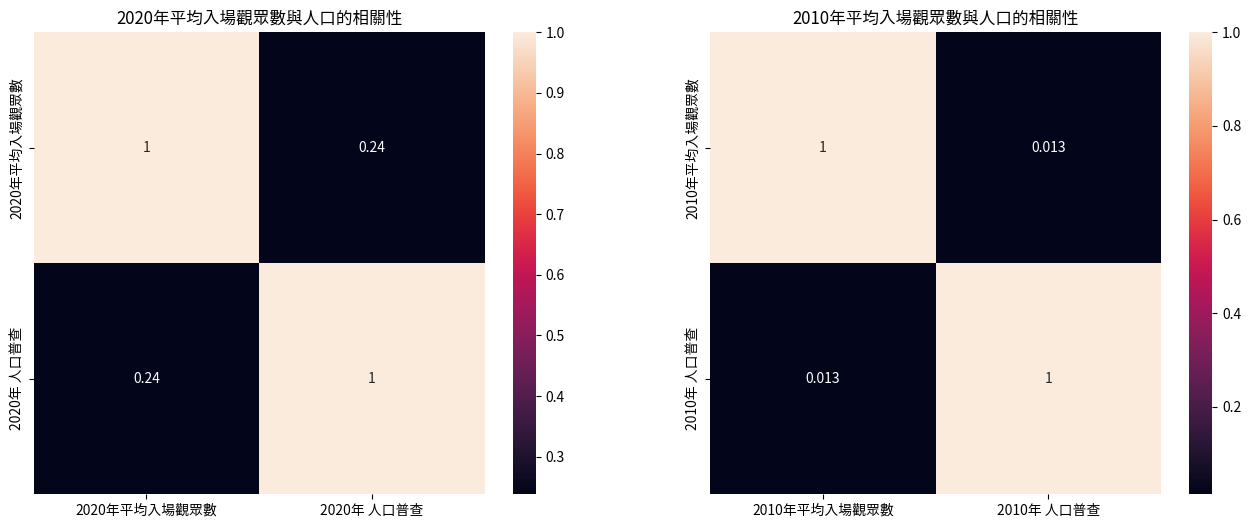

In [ ]:
# 設定兩個子圖（2行1列）
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# 繪製2020年的熱力圖
corr1_1 = data1[['2020年平均入場觀眾數','2020年 人口普查']].corr()
sns.heatmap(corr1_1,annot=True,ax=axes[0])
axes[0].set_title('2020年平均入場觀眾數與人口的相關性')
# 繪製2010年的熱力圖
corr1_2 = data1[['2010年平均入場觀眾數','2010年 人口普查']].corr()
sns.heatmap(corr1_2,annot=True,ax=axes[1])
axes[1].set_title('2010年平均入場觀眾數與人口的相關性')

將資料轉換為長格式並繪製出2010與2020年各球隊平均入場觀眾數。

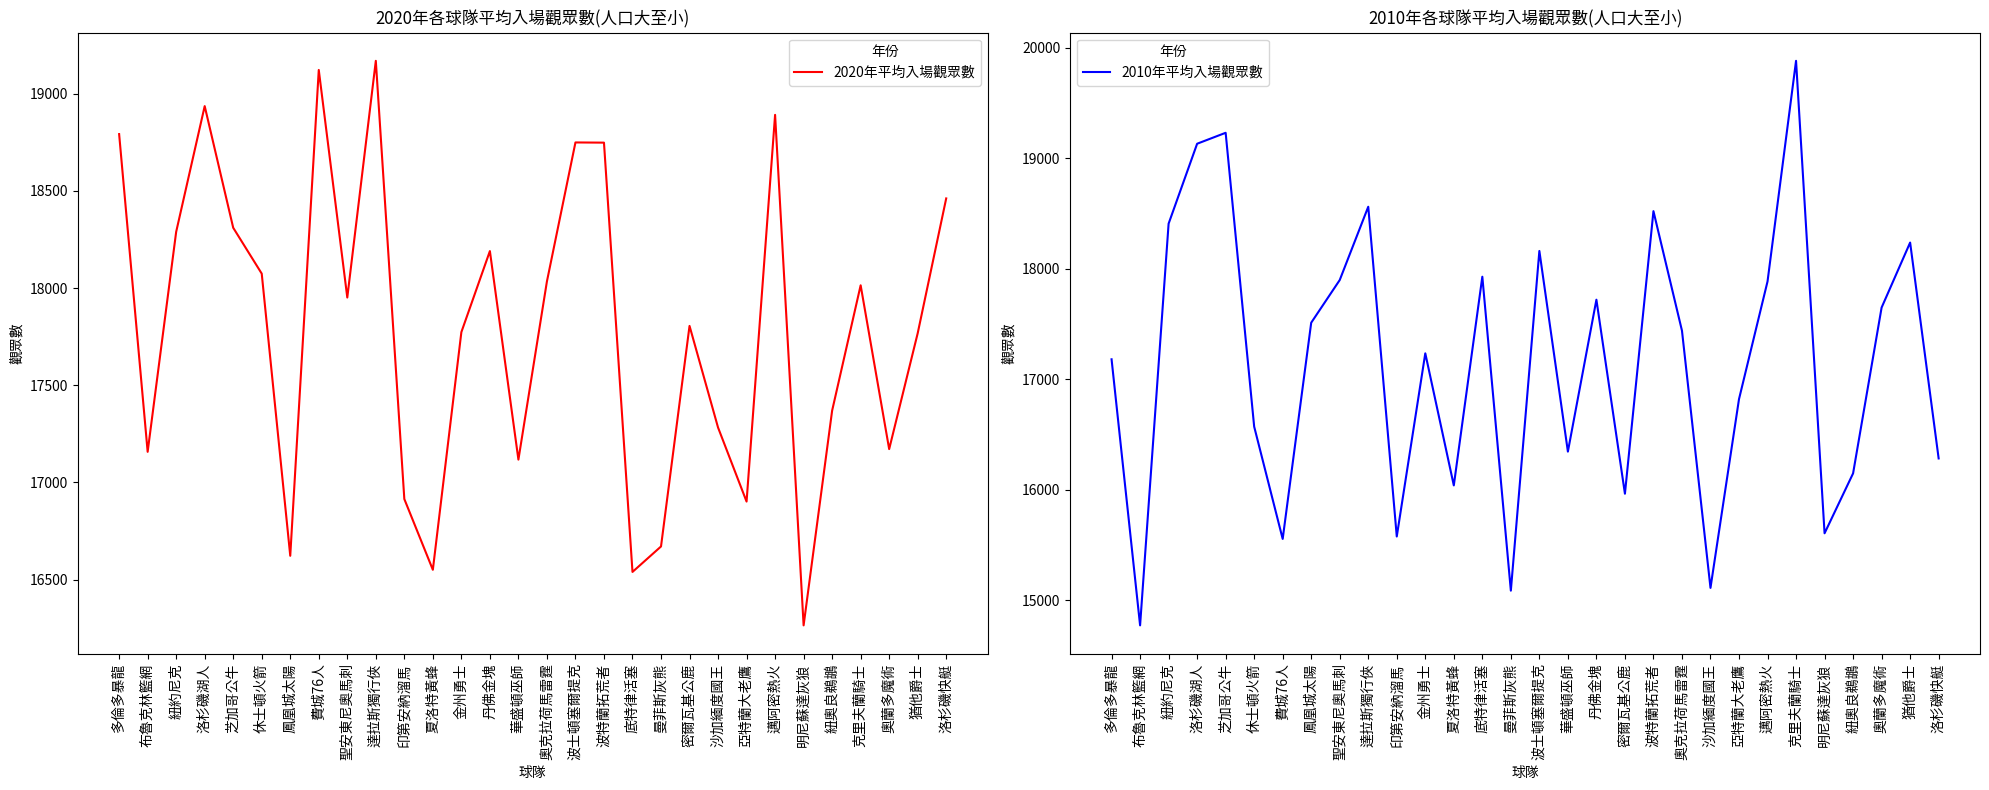

In [ ]:
# 根據2020年人口排序
data1_sorted2020 = data1.sort_values(by='2020年 人口普查', ascending=False)
# 轉為長格式
data_long1_1 = pd.melt(data1_sorted2020,id_vars='球隊',value_vars='2020年平均入場觀眾數',var_name='年份',value_name='平均入場觀眾數')
# 根據2010年人口排序
data1_sorted2010 = data1.sort_values(by='2010年 人口普查', ascending=False)
# 轉為長格式
data_long1_2 = pd.melt(data1_sorted2010,id_vars='球隊',value_vars='2010年平均入場觀眾數',var_name='年份',value_name='平均入場觀眾數')
# 建立子圖
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
# 設定顏色
palette = {'2010年平均入場觀眾數': 'blue', '2020年平均入場觀眾數': 'red'}
# 畫折線圖 (2020年)
sns.lineplot(data=data_long1_1, x='球隊', y='平均入場觀眾數', hue='年份', ax=axs[0], palette=palette)
axs[0].set_title('2020年各球隊平均入場觀眾數(人口大至小)')
axs[0].set_xlabel('球隊')
axs[0].set_ylabel('觀眾數')
axs[0].tick_params(axis='x', rotation=90)
# 畫折線圖 (2010年)
sns.lineplot(data=data_long1_2, x='球隊', y='平均入場觀眾數', hue='年份', ax=axs[1], palette=palette)
axs[1].set_title('2010年各球隊平均入場觀眾數(人口大至小)')
axs[1].set_xlabel('球隊')
axs[1].set_ylabel('觀眾數')
axs[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

**分析結果**：

1. 入場觀眾與城市人口無關聯，尤其在 2010 年明顯看出入場觀眾與人口關聯性極低。

2. 近十年 NBA 觀眾入場數大多為提升，但城市大小球隊並無顯著的影響觀眾入場數。

#### 明星球員是否會受大城市吸引?

準備數據集，保留2020年及2010年資料。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 將城市人口資料的索引改為球隊
nba_population_2 = nba_population[['球隊', '2020年 人口普查', '2010年 人口普查']]
nba_population_2_idx = nba_population_2.set_index('球隊')
# 保留觀眾數2020年和2010年的資料
all_years_allstar_2 = all_years_allstar[['球隊','2020年全明星人數','2010年全明星人數']]
# 合併表格
data2 = pd.merge( nba_population_2, all_years_allstar_2, on='球隊', how='inner')
# 輸出結果
data2

,球隊,2020年 人口普查,2010年 人口普查,2020年全明星人數,2010年全明星人數
0,丹佛金塊,715522,600158,1,2
1,亞特蘭大老鷹,498715,420003,1,2
2,休士頓火箭,2304580,2099451,2,0
3,克里夫蘭騎士,372624,396815,0,1
4,印第安納溜馬,887642,820445,1,0
5,夏洛特黃蜂,874579,731424,0,0
6,多倫多暴龍,14223942,13448494,2,1
7,奧克拉荷馬雷霆,681054,579999,1,1
8,奧蘭多魔術,307573,238300,0,1
9,密爾瓦基公鹿,577222,594833,2,0


利用熱力圖分析明星數與人口的相關性。

Text(0.5, 1.0, '2010年明星數與人口的相關性')

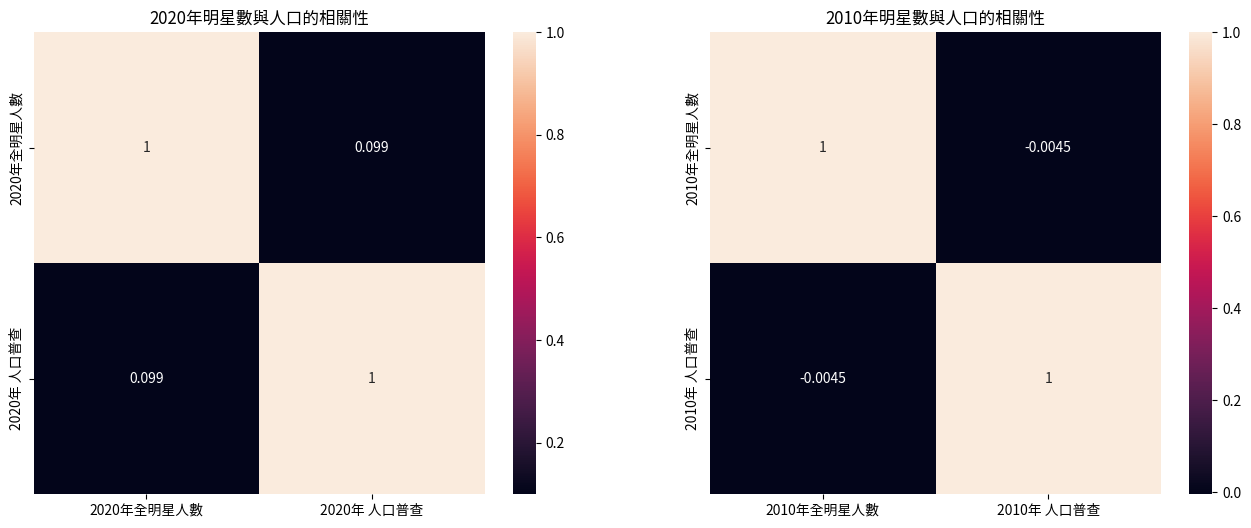

In [ ]:
# 設定兩個子圖（2行1列）
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# 繪製2020年的熱力圖
corr2_1 = data2[['2020年全明星人數','2020年 人口普查']].corr()
sns.heatmap(corr2_1,annot=True,ax=axes[0])
axes[0].set_title('2020年明星數與人口的相關性')
# 繪製2010年的熱力圖
corr2_2 = data2[['2010年全明星人數','2010年 人口普查']].corr()
sns.heatmap(corr2_2,annot=True,ax=axes[1])
axes[1].set_title('2010年明星數與人口的相關性')

將資料轉換為長格式並繪製出2010與2020年各球隊全明星人數。

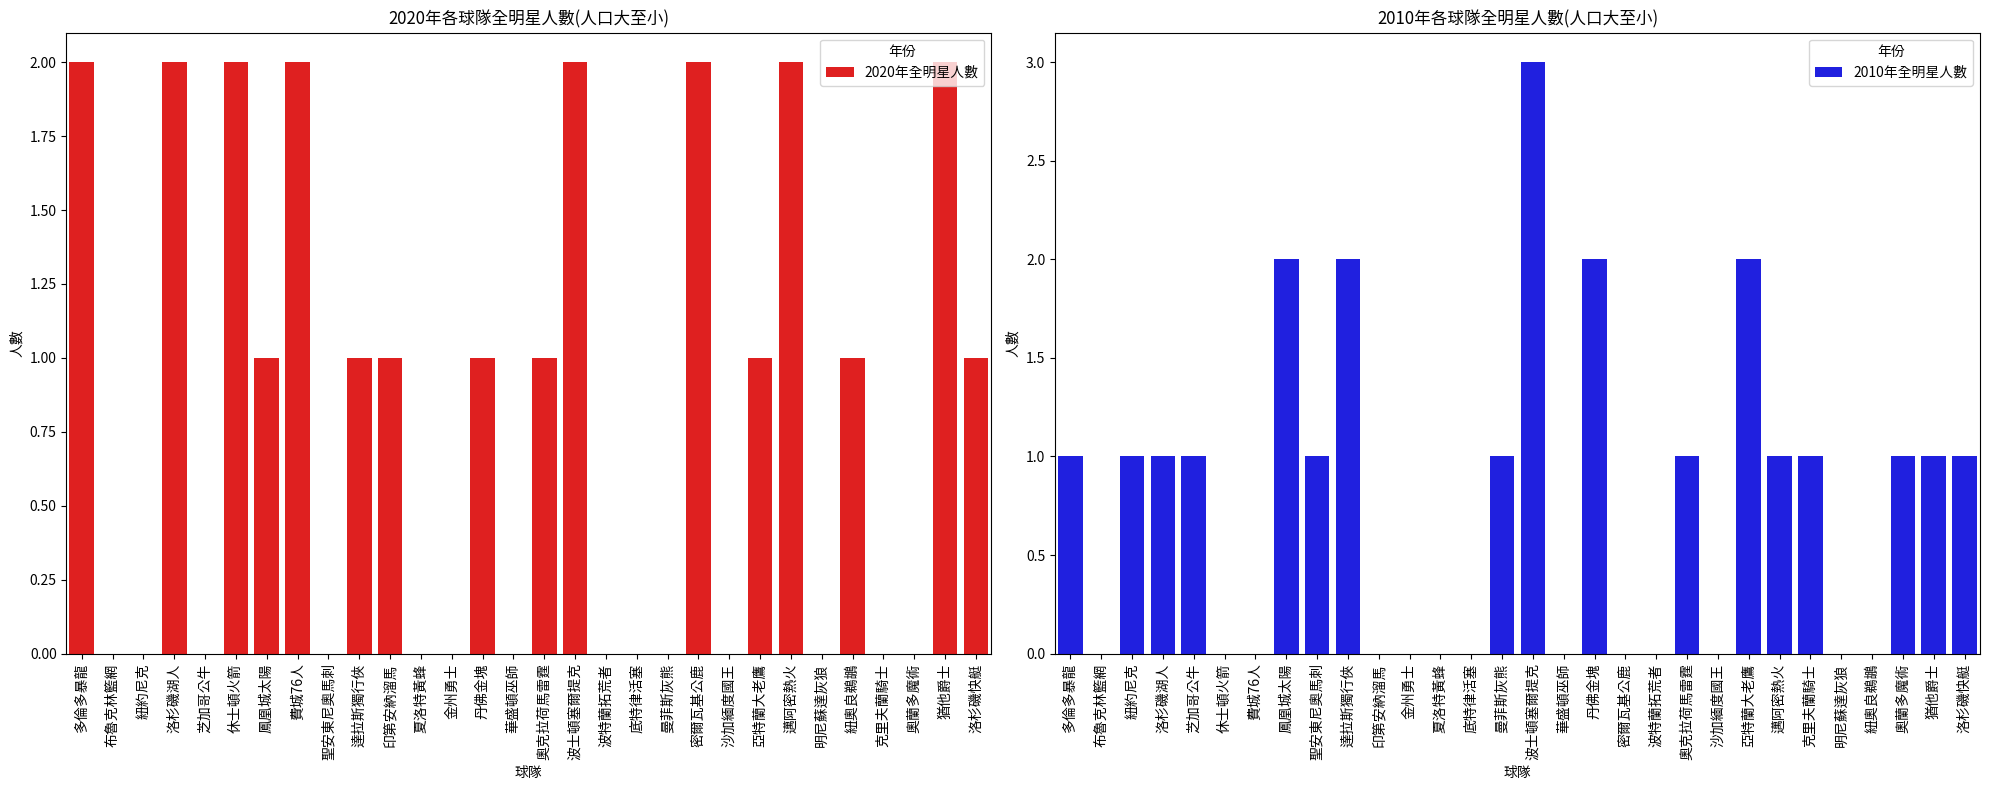

In [ ]:
# 根據2020年人口排序
data2_sorted2020 = data2.sort_values(by='2020年 人口普查', ascending=False)
# 轉為長格式
data_long2_1 = pd.melt(data2_sorted2020,id_vars='球隊',value_vars='2020年全明星人數',var_name='年份',value_name='全明星人數')
# 根據2010年人口排序
data2_sorted2010 = data2.sort_values(by='2010年 人口普查', ascending=False)
# 轉為長格式
data_long2_2 = pd.melt(data2_sorted2010,id_vars='球隊',value_vars='2010年全明星人數',var_name='年份',value_name='全明星人數')
# 建立子圖
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
# 設定顏色
palette = {'2010年全明星人數': 'blue', '2020年全明星人數': 'red'}
# 畫折線圖 (2020年)
sns.barplot(data=data_long2_1, x='球隊', y='全明星人數', hue='年份', ax=axs[0], palette=palette)
axs[0].set_title('2020年各球隊全明星人數(人口大至小)')
axs[0].set_xlabel('球隊')
axs[0].set_ylabel('人數')
axs[0].tick_params(axis='x', rotation=90)
# 畫折線圖 (2010年)
sns.barplot(data=data_long2_2, x='球隊', y='全明星人數', hue='年份', ax=axs[1], palette=palette)
axs[1].set_title('2010年各球隊全明星人數(人口大至小)')
axs[1].set_xlabel('球隊')
axs[1].set_ylabel('人數')
axs[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

**分析結果**：

1. 全明星人數與城市人口無關聯，尤其在2010年明顯看出入場觀眾與人口關聯性極低。

2. 2010 年多為各球隊都均有一位全名星，較少見有多位全明星於同隊的超級球隊，但 2020 年卻以兩位全明星於同隊較為常見。

#### 勝率是否影響觀眾與熱度？

輸入資料並調整為各別球隊為一組資料集，利用雙 Y 軸合併兩種折線圖，繪製各隊2005-2024年觀眾數與勝率變化，最後利用 Gradio製成選單。

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
# 處理觀眾數資料
all_years_attendance1 = all_years_attendance.copy()
all_years_attendance1.columns = [str(col)[:4] if str(col)[:4].isdigit() else col for col in all_years_attendance1.columns]
if '球隊' in all_years_attendance1.columns:
    all_years_attendance1.set_index('球隊', inplace=True)
# 處理勝率資料
all_years_standings1 = all_years_standings.copy()
pct_cols = all_years_standings1.filter(like='年勝率').columns
all_years_standings1[pct_cols] = all_years_standings1[pct_cols].replace('%', '', regex=True).astype(float)
rename_dict = {col: str(col)[:4] for col in pct_cols}
all_years_standings1.rename(columns=rename_dict, inplace=True)
all_years_standings1.set_index('球隊', inplace=True)
# 找出年份
common_years = all_years_attendance1.columns.intersection(all_years_standings1.columns)
# 繪圖函式：顯示觀眾數、勝率
def plot_team_data(team):
    try:
        attendance = all_years_attendance1.loc[team, common_years]
        win_pct = all_years_standings1.loc[team, common_years]
        if win_pct.isnull().all() or attendance.isnull().all():
            return f'{team} 的資料不足，無法繪圖。'
        fig, ax1 = plt.subplots(figsize=(10, 5))
        ax2 = ax1.twinx()
        ax1.plot(common_years, attendance, label='觀眾數', color='blue', marker='o')
        ax1.set_ylabel('觀眾數', color='blue')
        ax2.plot(common_years, win_pct, label='勝率', color='red', linestyle='--', marker='x')
        ax2.set_ylabel('勝率(%)', color='red')
        ax2.set_ylim(0, 100)
        ax2.grid(False)
        ax1.set_title(f'{team}2005–2024年觀眾數與勝率變化')
        ax1.set_xlabel('年份')
        # 合併圖例
        lines = ax1.get_lines() + ax2.get_lines()
        labels = [l.get_label() for l in lines]
        ax1.legend(lines, labels, loc='upper left')
        plt.tight_layout()
        return fig
    except KeyError:
        return f'{team}沒有有效的資料。'
# 建立Gradio互動介面
demo = gr.Interface(
    fn=plot_team_data,
    inputs=gr.Dropdown(choices=all_years_attendance1.index.tolist(), label='選擇球隊'),
    outputs=gr.Plot(label='球隊歷年觀眾數與勝率'),
    title='🏀 NBA球隊2005–2024年觀眾數與勝率圖表',
    live=True
)
# 啟動Gradio
demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://221bb83a7d6100229d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**分析結果**：

1. 大多數球隊在勝率提升後，隔季觀眾數明顯成長，明顯可看出球隊勝率會影響觀眾入場的意願。

2. 2021 年觀眾入場數嚴重減少，由於當時 NBA 因應新冠疫情的情勢，將 NBA 設立泡泡區，觀眾不可入場，只可藉由直播觀賽。

#### 明星球員多寡是否吸引更多觀眾入場？

輸入資料並調整為各別球隊為一組資料集，利用雙 Y 軸合併折線圖與長條圖，繪製各隊2005-2024年觀眾數與明星球員數的變化，最後利用 Gradio製成選單。

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
# 處理觀眾數資料
all_years_attendance2 = all_years_attendance.copy()
all_years_attendance2.columns = [str(col)[:4] if str(col)[:4].isdigit() else col for col in all_years_attendance2.columns]
if '球隊' in all_years_attendance2.columns:
    all_years_attendance2.set_index('球隊', inplace=True)
# 處理全明星人數資料
all_years_allstar2 = all_years_allstar.copy()
all_years_allstar2.columns = [str(col)[:4] if str(col)[:4].isdigit() else col for col in all_years_allstar2.columns]
if '球隊' in all_years_allstar2.columns:
    all_years_allstar2.set_index('球隊', inplace=True)
# 取兩資料共用年份範圍
common_years = all_years_attendance2.columns.intersection(all_years_allstar2.columns)
# 繪圖函式
def plot_team_allstar(team):
    try:
        attendance = all_years_attendance2.loc[team, common_years]
        allstars = all_years_allstar2.loc[team, common_years]
        fig, ax1 = plt.subplots(figsize=(10, 5))
        ax2 = ax1.twinx()
        ax1.plot(common_years, attendance, color='blue', marker='o', label='觀眾數')
        ax1.set_ylabel('觀眾數', color='blue')
        ax2.bar(common_years, allstars, color='red', alpha=0.7, label='明星球員數')
        ax2.set_ylabel('明星球員數', color='red')
        ax2.grid(False)
        ax1.set_xlabel('年份')
        ax1.set_title(f'{team}2005–2024年觀眾數與明星球員數變化')
        # 合併圖例
        lines = ax1.get_lines()
        labels = [l.get_label() for l in lines] + ['明星球員數']
        ax1.legend(lines + [ax2.patches[0]], labels, loc='upper left')
        plt.tight_layout()
        return fig
    except KeyError:
        return f'{team}沒有有效的資料。'
# Gradio介面
demo = gr.Interface(
    fn=plot_team_allstar,
    inputs=gr.Dropdown(choices=all_years_attendance2.index.tolist(), label='選擇球隊'),
    outputs=gr.Plot(label='球隊觀眾數與明星球員數變化圖'),
    title='🏀 NBA球隊2005–2024年觀眾數與明星球員數圖表',
    live=True
)
# 啟動Gradio
demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://05874241aa2196d2e0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**分析結果**：

1. 雖然觀眾人數變動幅度較小，但可以看出沒有明星球員的球隊觀眾人數大多位於16000附近，相對之下，具有大量明星球員的球隊觀眾人數飆升至18000附近，由此可見，明星球員數量與觀眾人數呈正相關。

2. 這邊數據由於未考量有入選全明星且受傷或賽季報銷的球員，因此會產生出如籃網隊完全沒有明星球員的現象發生。

#### 明星球員數量對戰績的影響力？

輸入資料並調整為各別球隊為一組資料集，利用雙 Y 軸合併折線圖與長條圖，繪製各隊2005-2024年勝率與明星球員數的變化，最後利用 Gradio製成選單。

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
# 處理觀眾數資料
all_years_standings3 = all_years_standings.copy()
pct_cols = all_years_standings3.filter(like='年勝率').columns
all_years_standings3[pct_cols] = all_years_standings3[pct_cols].replace('%', '', regex=True).astype(float)
rename_dict = {col: str(col)[:4] for col in pct_cols}
all_years_standings3.rename(columns=rename_dict, inplace=True)
all_years_standings3.set_index('球隊', inplace=True)
# 處理全明星人數資料
all_years_allstar3 = all_years_allstar.copy()
all_years_allstar3.columns = [str(col)[:4] for col in all_years_allstar3.columns]
if '球隊' in all_years_allstar3.columns:
    all_years_allstar3.set_index('球隊', inplace=True)
# 取兩資料共用年份範圍
common_years = all_years_standings3.columns.intersection(all_years_allstar3.columns)
# 繪圖函式
def plot_team_performance(team):
    try:
        standings = all_years_standings3.loc[team, common_years]
        allstars = all_years_allstar3.loc[team, common_years]
        fig, ax1 = plt.subplots(figsize=(10, 5))
        ax2 = ax1.twinx()
        ax1.plot(common_years, standings, color='blue', marker='o', label='勝率')
        ax1.set_ylabel('勝率(%)', color='blue')
        ax2.bar(common_years, allstars, color='red', alpha=0.7, label='明星球員數')
        ax2.set_ylabel('明星球員數', color='red')
        ax2.grid(False)
        ax1.set_xlabel('年份')
        ax1.set_title(f'{team}2005–2024年勝率與明星球員數變化')
        # 合併圖例
        lines = ax1.get_lines()
        labels = [l.get_label() for l in lines] + ['明星球員數']
        ax1.legend(lines + [ax2.patches[0]], labels, loc='upper left')
        plt.tight_layout()
        return fig
    except KeyError:
        return f'{team}沒有有效的資料。'
# Gradio介面
demo = gr.Interface(
    fn=plot_team_performance,
    inputs=gr.Dropdown(choices=all_years_standings3.index.tolist(), label='選擇球隊'),
    outputs=gr.Plot(label='球隊勝率與明星球員數變化圖'),
    title='🏀 NBA球隊2005–2024年勝率與明星球員數圖表',
    live=True
)
# 啟動Gradio
demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fde6f771c8d8ab95fa.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**分析結果**：

1. 可以明顯看出，有大量全明星球員的超級球隊，多數都會使勝率提升，但少部分可能因球員間的配合、戰術適應性、頻繁傷病，造成勝率為顯著提升，顯示球員化學與教練體系也同樣重要。

2. 明星球員數量與球隊勝率有一定程度正相關。

### 結論與建議

#### 結論

1. 城市人口對觀眾人數無明顯關聯，小城市球隊也能吸引大量觀眾。

2. 明星球員的分布與城市大小無關，大市場未必擁有最多球星。

3. 球隊勝率與觀眾人數呈現延遲性正向關係，表現佳能有效提升球迷熱情。

4. 明星球員能吸引更多觀眾，球星魅力仍是吸票關鍵。

5. 勝率與明星球員數大致正相關，仍需團隊協調與戰術整合。

6. 疫情等外部因素會扭曲數據，外部環境需納入分析考量。

7. 明星集中度在近年有所提升，形成超級球隊趨勢明顯。

#### 建議






1. 球隊應強化球星經營與戰力布局，或是發掘、培養潛力新星，有助提升球隊整體吸引力。

2. 球隊應持續投資球員健康與訓練，降低明星傷退對戰力與觀眾的影響。

3. NBA 官方可強化小市場曝光與數位互動，縮小大市場優勢落差。

4. 分析應多考量其他要素，依造過於簡化的數據對比，容易造成誤判。

5. 未來分析可加入轉播權收入、票價結構與地區收視率等更多維度。